# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp - 273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | sehithwa
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | loralai
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | viligili
City not found. Skipping...
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | tilichiki
Processing Record 23

Processing Record 37 of Set 4 | muisne
Processing Record 38 of Set 4 | ketchikan
Processing Record 39 of Set 4 | vila franca do campo
Processing Record 40 of Set 4 | brewster
Processing Record 41 of Set 4 | nargana
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | bac giang
Processing Record 44 of Set 4 | ranong
Processing Record 45 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | svobodnyy
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | klaksvik
Processing Record 0 of Set 5 | pisco
Processing Record 1 of Set 5 | gobabis
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | san carlos de bariloche
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | bolshaya martynovka
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | markivka
Processing Record 8 of Set 5 | lorengau
Proces

Processing Record 28 of Set 8 | gravenhurst
Processing Record 29 of Set 8 | toliary
City not found. Skipping...
Processing Record 30 of Set 8 | kaeo
Processing Record 31 of Set 8 | jiutai
Processing Record 32 of Set 8 | necochea
Processing Record 33 of Set 8 | colares
Processing Record 34 of Set 8 | upernavik
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | mahanje
Processing Record 37 of Set 8 | nipawin
Processing Record 38 of Set 8 | luganville
Processing Record 39 of Set 8 | quatre cocos
Processing Record 40 of Set 8 | savannah bight
Processing Record 41 of Set 8 | manokwari
Processing Record 42 of Set 8 | nouadhibou
Processing Record 43 of Set 8 | tir pol
City not found. Skipping...
Processing Record 44 of Set 8 | kudahuvadhoo
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | laguna
Processing Record 47 of Set 8 | bairiki
Processing Record 48 of Set 8 | casablanca
Processing Record 49 of Set 8 | goure
Processing Record 0 of Set 9 

Processing Record 16 of Set 12 | villa carlos paz
Processing Record 17 of Set 12 | barra do corda
Processing Record 18 of Set 12 | karakose
City not found. Skipping...
Processing Record 19 of Set 12 | nuevo progreso
Processing Record 20 of Set 12 | iquique
Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | mayo
Processing Record 23 of Set 12 | seymchan
Processing Record 24 of Set 12 | itarema
Processing Record 25 of Set 12 | tillabery
City not found. Skipping...
Processing Record 26 of Set 12 | rundu
Processing Record 27 of Set 12 | kieta
Processing Record 28 of Set 12 | weihe
Processing Record 29 of Set 12 | fuerte olimpo
Processing Record 30 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 31 of Set 12 | sabha
Processing Record 32 of Set 12 | ostrovnoy
Processing Record 33 of Set 12 | bokoro
Processing Record 34 of Set 12 | ulundurpettai
City not found. Skipping...
Processing Record 35 of Set 12 | corinth
Processing Record 36 of Set 12 | 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.5167,57.5167,26.41,64,30,5.06,MU,1669892728
1,busselton,-33.6500,115.3333,18.14,63,1,6.49,AU,1669892729
2,castro,-24.7911,-50.0119,19.14,88,33,2.55,BR,1669892729
3,sehithwa,-20.4667,22.7167,34.80,12,0,4.46,BW,1669892730
4,airai,-8.9266,125.4092,16.53,95,100,1.08,TL,1669892730


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,souillac,-20.5167,57.5167,26.41,64,30,5.06,MU,1669892728
1,busselton,-33.6500,115.3333,18.14,63,1,6.49,AU,1669892729
2,castro,-24.7911,-50.0119,19.14,88,33,2.55,BR,1669892729
3,sehithwa,-20.4667,22.7167,34.80,12,0,4.46,BW,1669892730
4,airai,-8.9266,125.4092,16.53,95,100,1.08,TL,1669892730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

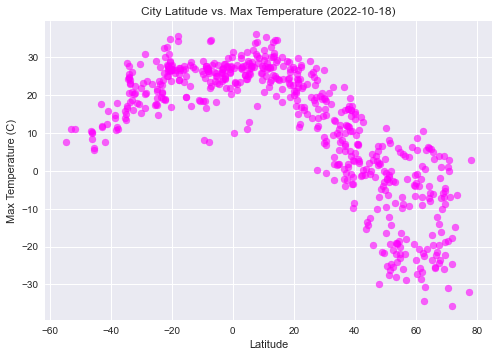

In [22]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", c='magenta', alpha=0.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.style.use('seaborn')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

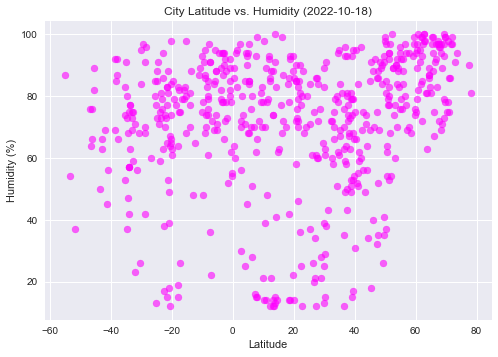

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",  c='magenta', alpha=0.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.style.use('seaborn')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

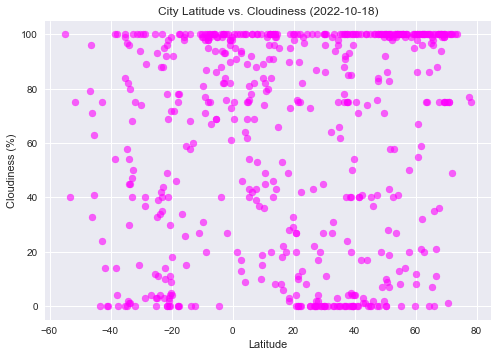

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",  c='magenta', alpha=0.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.style.use('seaborn')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

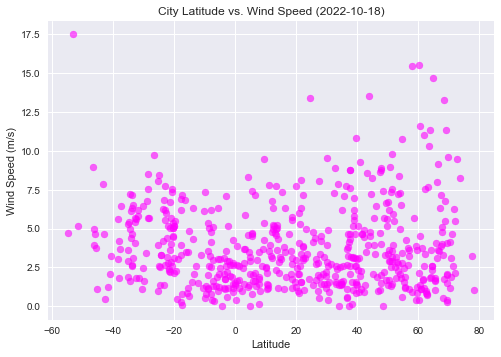

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", c='magenta', alpha=0.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.style.use('seaborn')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, ylabel, line_eq_pos):
    x_values = x_values
    y_values = y_values
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values,  c='magenta', alpha=0.6)
#     plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_eq_pos,fontsize=15,color="red")
    
    plt.style.use('seaborn')
    plt.xlabel('Latitude')
    plt.ylabel(f'{ylabel}')
    
    print(f"The r-value is {rvalue}")
    plt.show()   

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,loralai,30.3705,68.5980,18.60,15,96,2.60,PK,1669892730
6,kapaa,22.0752,-159.3190,24.18,90,75,3.09,US,1669892731
8,kodiak,57.7900,-152.4072,3.73,70,20,15.43,US,1669892732
9,talnakh,69.4865,88.3972,-18.90,99,100,0.24,RU,1669892732
13,guerrero negro,27.9769,-114.0611,13.87,84,4,4.17,MX,1669892733


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,souillac,-20.5167,57.5167,26.41,64,30,5.06,MU,1669892728
1,busselton,-33.6500,115.3333,18.14,63,1,6.49,AU,1669892729
2,castro,-24.7911,-50.0119,19.14,88,33,2.55,BR,1669892729
3,sehithwa,-20.4667,22.7167,34.80,12,0,4.46,BW,1669892730
4,airai,-8.9266,125.4092,16.53,95,100,1.08,TL,1669892730


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.844034581317152


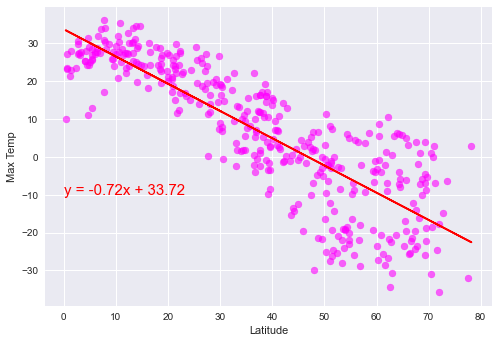

In [43]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (0, -10))

The r-value is 0.5982586951802108


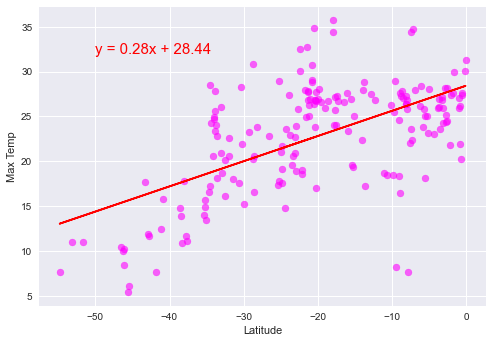

In [45]:
# Linear regression on Southern Hemisphere
# x_values = southern_hemi_df['Lat']
# y_values = southern_hemi_df['Max Temp']

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values,  c='magenta', alpha=0.6)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.style.use('seaborn')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')

# print(f"The r-value is {rvalue}")
# plt.show()

lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', (-50, 32))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3429676338764359


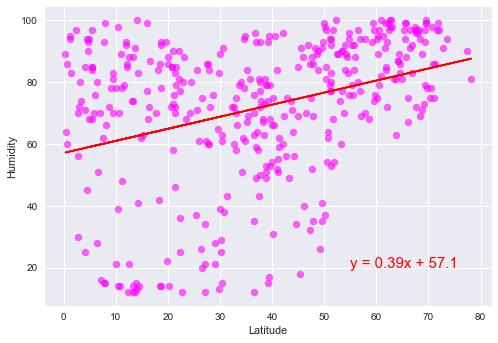

In [47]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (55, 20))

The r-value is 0.20867992922087744


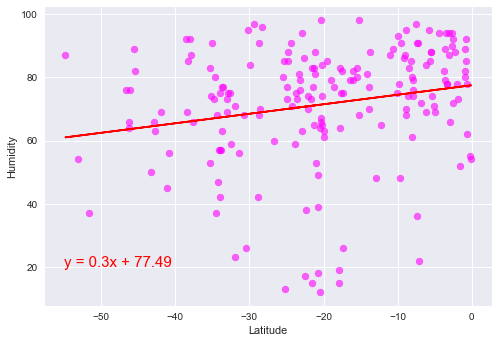

In [49]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.12896596605948282


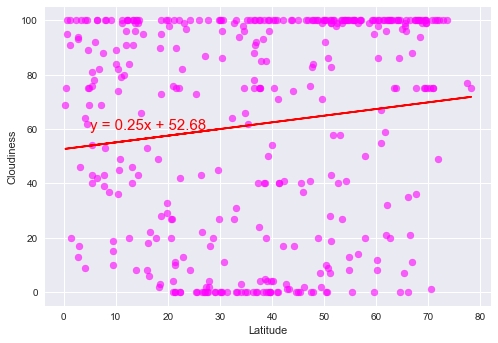

In [58]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (5, 60))

The r-value is 0.3346892574894332


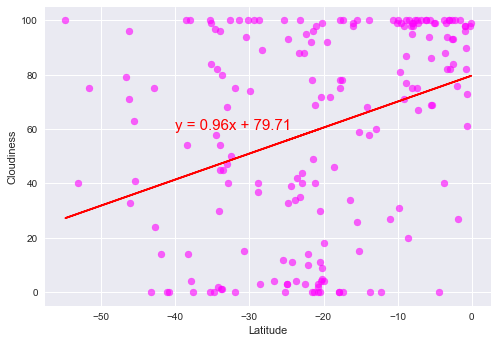

In [60]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-40, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.1365613328877086


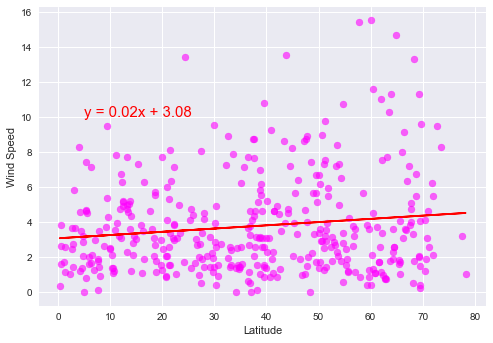

In [61]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (5, 10))

The r-value is -0.38725783422644183


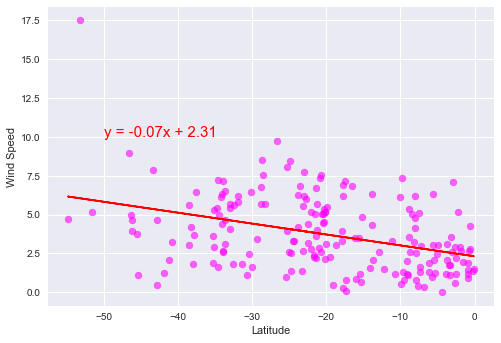

In [62]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE